In [1]:
import numpy as np
import math
import pdb
from scipy.special import binom
import matplotlib.pyplot as plt
#source: https://stats.stackexchange.com/questions/72774/numerical-example-to-understand-expectation-maximization

## E-M Coin Toss Example as given in the EM tutorial paper by Do and Batzoglou* ##

def get_binomial_log_likelihood(obs, probs):
    """ Return the (log)likelihood of obs, given the probs"""
    # Binomial Distribution Log PDF
    # ln (pdf)      = Binomial Coeff * product of probabilities
    # ln[f(x|n, p)] =   comb(N,k)    * num_heads*ln(pH) + (N-num_heads) * ln(1-pH)

    N = sum(obs);#number of trials  
    k = obs[0] # number of heads
    binomial_coeff = math.factorial(N) / (math.factorial(N-k) * math.factorial(k))
    prod_probs = obs[0]*math.log(probs[0]) + obs[1]*math.log(1-probs[0])
    log_lik = binomial_coeff + prod_probs

    return log_lik

def get_binomial_log_likelihood(obs, probs):
    """ Return the (log)likelihood of obs, given the probs- example using scipy"""
    # Binomial Distribution Log PDF
    # ln (pdf)      = Binomial Coeff * product of probabilities
    # ln[f(x|n, p)] =   comb(N,k)    * num_heads*ln(pH) + (N-num_heads) * ln(1-pH)

    N = sum(obs);#number of trials  
    k = obs[0] # number of heads
    binomial_coeff = binom(N, k)
    prod_probs = obs[0]*math.log(probs[0]) + obs[1]*math.log(1-probs[0])
    log_lik = binomial_coeff + prod_probs

    return log_lik

In [2]:
# 1st:  Coin B, {HTTTHHTHTH}, 5H,5T
# 2nd:  Coin A, {HHHHTHHHHH}, 9H,1T
# 3rd:  Coin A, {HTHHHHHTHH}, 8H,2T
# 4th:  Coin B, {HTHTTTHHTT}, 4H,6T
# 5th:  Coin A, {THHHTHHHTH}, 7H,3T
# so, from MLE: pA(heads) = 0.80 and pB(heads)=0.45

# represent the experiments
head_counts = np.array([5,9,8,4,7])
tail_counts = 10-head_counts
experiments = list(zip(head_counts,tail_counts))

# initialise the pA(heads) and pB(heads)
pA_heads = np.zeros(100); pA_heads[0] = 0.60
pB_heads = np.zeros(100); pB_heads[0] = 0.50

In [3]:
# E-M begins!
delta = 0.001  
j = 0 # iteration counter
improvement = float('inf')
while (improvement>delta):
#     pdb.set_trace()
    expectation_A = np.zeros((len(experiments),2), dtype=float) 
    expectation_B = np.zeros((len(experiments),2), dtype=float)
    for i in range(0, len(experiments)):
        e = experiments[i] # i'th experiment
          # loglikelihood of e given coin A:
        ll_A = get_binomial_log_likelihood(e, np.array([pA_heads[j], 1-pA_heads[j]])) 
          # loglikelihood of e given coin B
        ll_B = get_binomial_log_likelihood(e, np.array([pB_heads[j], 1-pB_heads[j]])) 

          # corresponding weight of A proportional to likelihood of A 
        weightA = math.exp(ll_A) / (math.exp(ll_A) + math.exp(ll_B)) 

          # corresponding weight of B proportional to likelihood of B
        weightB = math.exp(ll_B) / (math.exp(ll_A) + math.exp(ll_B)) 

        expectation_A[i] = np.dot(weightA, e) 
        expectation_B[i] = np.dot(weightB, e)

    pA_heads[j+1] = sum(expectation_A)[0] / sum(sum(expectation_A)); 
    pB_heads[j+1] = sum(expectation_B)[0] / sum(sum(expectation_B)); 

    improvement = ( max( abs(np.array([pA_heads[j+1],pB_heads[j+1]]) - 
                    np.array([pA_heads[j],pB_heads[j]]) )) )
    j = j+1

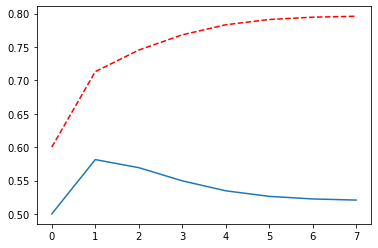

In [4]:
plt.figure();
plt.plot(range(0,j),pA_heads[0:j], 'r--')
plt.plot(range(0,j),pB_heads[0:j])
plt.show()

In [27]:
from matplotlib import pyplot as plt
import matplotlib as mpl

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(rolls, c, Y[i][j]))
        Z.append(z)
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B)$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        

def coin_marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)))
    return sum(trials)

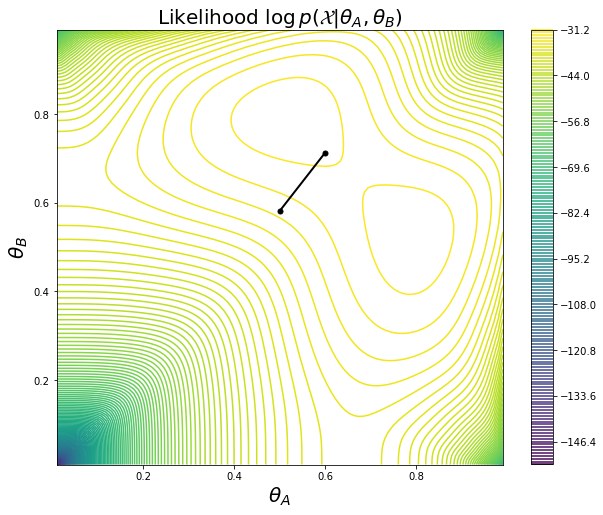

In [30]:
rolls = [ "HTTTHHTHTH", "HHHHTHHHHH", "HTHHHHHTHH", 
          "HTHTTTHHTT", "THHHTHHHTH"]

plot_coin_likelihood(rolls, [pA_heads[:8], pB_heads[:8]])